In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, v_measure_score

In [4]:
df_ai = pd.read_csv('/vol/bitbucket/sg2121/fypdataset/dataset/analysis/normal_200_aigm_anal_output.csv')
df_human = pd.read_csv('/vol/bitbucket/sg2121/fypdataset/dataset/analysis/normal_460_human_anal_output.csv')

In [5]:
# Add ground truth labels
df_ai['label'] = 'AI'
df_human['label'] = 'Human'

# Combine into a single dataframe
df = pd.concat([df_ai, df_human], ignore_index=True)

In [12]:
# Select features for clustering
X = df[['spectral_centroid', 'spectral_bandwidth']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering (e.g., 2 clusters for AI vs Human)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the dataframe
df['cluster'] = clusters

# Map cluster labels to actual labels if needed
pd.crosstab(df['cluster'], df['label'], rownames=['Cluster'], colnames=['Actual Label'])

Actual Label,AI,Human
Cluster,,
0,323,241
1,58,221


In [13]:
ari = adjusted_rand_score(df['label'], df['cluster'])
v_score = v_measure_score(df['label'], df['cluster'])

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"V-Measure Score: {v_score:.3f}")

Adjusted Rand Index: 0.083
V-Measure Score: 0.095


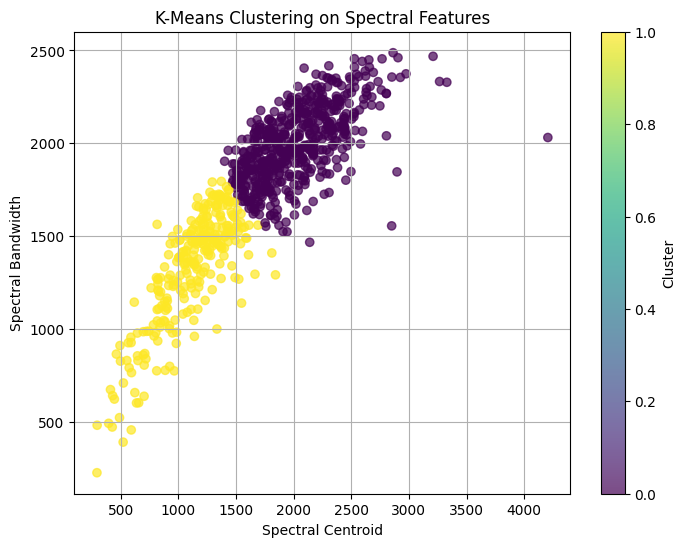

In [14]:
# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['spectral_centroid'], df['spectral_bandwidth'], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Spectral Centroid')
plt.ylabel('Spectral Bandwidth')
plt.title('K-Means Clustering on Spectral Features')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()